# Import libraries

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import Functions

### dslabs_functions

In [21]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


### data functions

In [22]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [ ]:
## Get sample from dataset 

In [23]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'data/citi_bike_pre_proc.csv'

file_tag = 'Citi Bike'

In [24]:
test_data = False
# test_data = False
 
# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

# Display the first 100 rows of the DataFrame


id_cols=['ride_id','start_time', 'end_time','start_station_id','end_station_id','start_lat','start_lng', 'end_lat', 'end_lng','ride_duration_sec']
#remove also col = 'snowfall_cm' because it has only 0 values in our dataset

df=df.drop(columns=id_cols, axis=1)

display(df.info())
display(df.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   bike_type            object 
 1   start_station        object 
 2   end_station          object 
 3   user_type            object 
 4   start_borough        object 
 5   end_borough          object 
 6   day_of_month         int64  
 7   hour                 int64  
 8   day_of_week          object 
 9   is_weekend           int64  
 10  time_of_day          object 
 11  ride_duration_min    float64
 12  temperature_2m       float64
 13  rain_mm              float64
 14  snowfall_cm          float64
 15  wmo_weather_code     int64  
 16  cloud_cover_low_pct  int64  
 17  wind_speed_10m       float64
 18  wmo_weather_desc     object 
 19  ride_distance_km     float64
 20  ride_avg_speed       float64
dtypes: float64(7), int64(5), object(9)
memory usage: 511.7+ MB


None

,bike_type,start_station,end_station,user_type,start_borough,end_borough,day_of_month,hour,day_of_week,is_weekend,...,ride_duration_min,temperature_2m,rain_mm,snowfall_cm,wmo_weather_code,cloud_cover_low_pct,wind_speed_10m,wmo_weather_desc,ride_distance_km,ride_avg_speed
0,electric_bike,FDR Drive & E 35 St,E 10 St & 2 Ave,member,Manhattan,Manhattan,27,13,Saturday,1,...,9.161483,14.3,0.0,0.0,3,16,25.3,Overcast,2.037884,13.346422
1,electric_bike,Forsyth St & Grand St,E 10 St & 2 Ave,member,Manhattan,Manhattan,25,15,Thursday,0,...,4.639433,11.2,0.0,0.0,0,0,13.7,Clear sky,1.447460,18.719442
2,electric_bike,E 20 St & 2 Ave,Mott St & Prince St,member,Manhattan,Manhattan,6,11,Saturday,1,...,6.865817,9.6,0.0,0.0,3,95,27.9,Overcast,1.785276,15.601426
3,electric_bike,Eastern Pkwy & Washington Ave,Eastern Pkwy & Franklin Ave (SW Corner),member,Brooklyn,Brooklyn,6,16,Saturday,1,...,2.289150,10.7,0.0,0.0,3,11,25.4,Overcast,0.431973,11.322269
4,electric_bike,W 27 St & 6 Ave,E 25 St & 1 Ave,member,Manhattan,Manhattan,10,17,Wednesday,0,...,7.947850,15.0,0.0,0.0,2,44,10.7,Partly cloudy,1.376807,10.393806
5,electric_bike,Cleveland Pl & Spring St,Columbia Heights & Cranberry St,member,Manhattan,Brooklyn,7,14,Sunday,1,...,27.290533,13.4,0.0,0.0,3,0,22.3,Overcast,2.404062,5.285486
6,electric_bike,Perry St & Bleecker St,Allen St & Rivington St,member,Manhattan,Manhattan,25,18,Thursday,0,...,10.656417,7.9,0.0,0.0,0,0,15.4,Clear sky,2.072039,11.666429
7,electric_bike,Flatbush Ave & Ocean Ave,Columbia Heights & Cranberry St,member,Brooklyn,Brooklyn,14,14,Sunday,1,...,23.607000,20.8,0.0,0.0,3,0,21.3,Overcast,4.927812,12.524620
8,electric_bike,Frederick Douglass Blvd & Harlem River Dr,Amsterdam Ave & W 125 St,member,Manhattan,Manhattan,17,12,Wednesday,0,...,10.698533,15.4,0.0,0.0,3,79,18.2,Overcast,2.572462,14.427000
9,electric_bike,W 27 St & 6 Ave,E 10 St & 2 Ave,member,Manhattan,Manhattan,26,9,Friday,0,...,7.501383,10.4,0.0,0.0,0,0,4.4,Clear sky,1.758236,14.063292


In [25]:
display(df.shape)

(3193597, 21)

# NOTES / TO DOS

- Sampling on the main file. Or just get data from 3 months of the year like (march, april, may)
- Add boroughs to the city bike data (DONE)
    ask chatgpt to get borough name (queens, manathan, bronx,...) with the station name
- Neste dataset, juntar info de distancias das viagens, e vais ter a possibilidade de ter a velocidade na viagem (vigens mais rápidas ou mais lentas)
    - Para juntar as distancias, tentar obter através da api do Open street map. Api que consegues calcular as distancias entre as distancias da estacao inicial e final (DONE)
        - considerar colunas start_lat, start_lng,	end_lat, end_lng
- REMOVER COLUNAS IDs do dataset antes do data profiling - (DONE)

In [7]:
display(df.columns)

Index(['bike_type', 'start_station', 'end_station', 'user_type',
       'start_borough', 'end_borough', 'day_of_month', 'hour', 'day_of_week',
       'is_weekend', 'time_of_day', 'ride_duration_min', 'temperature_2m',
       'rain_mm', 'snowfall_cm', 'wmo_weather_code', 'cloud_cover_low_pct',
       'wind_speed_10m', 'wmo_weather_desc', 'ride_distance_km',
       'ride_avg_speed'],
      dtype='object')

# Data Profiling

## Dataset Description

- Desc:The dataset was provides by citi bike and it contains data on the trips made by the citi byke share system users in New York
- Time scope: data for the period of april 2024
- The original dataset contained data on the rides done by citi bike users, to enrich the analysis we also add information about some weather parameters in new york for the period analysed.

-> The dataset tracks cart behavior in Nov 2019 to classify purchases.








## Dimensionality

### Number of records and variables

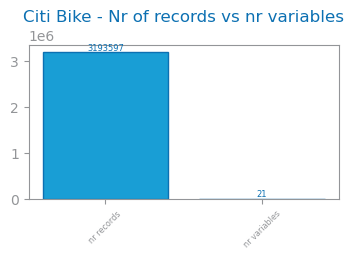

In [26]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} - Nr of records vs nr variables"
)
savefig(f"images/{file_tag}_profiling_dimensionality.png")
show()

#### Analysis for the report

Our initial dataset, after data pre processing, resulted in 3,1M records and 21 variables. 

### Missing values

In [8]:
df.isnull().sum()

bike_type              0
start_station          0
end_station            0
user_type              0
start_borough          0
end_borough            0
day_of_month           0
hour                   0
day_of_week            0
is_weekend             0
time_of_day            0
ride_duration_min      0
temperature_2m         0
rain_mm                0
snowfall_cm            0
wmo_weather_code       0
cloud_cover_low_pct    0
wind_speed_10m         0
wmo_weather_desc       0
ride_distance_km       0
ride_avg_speed         0
dtype: int64

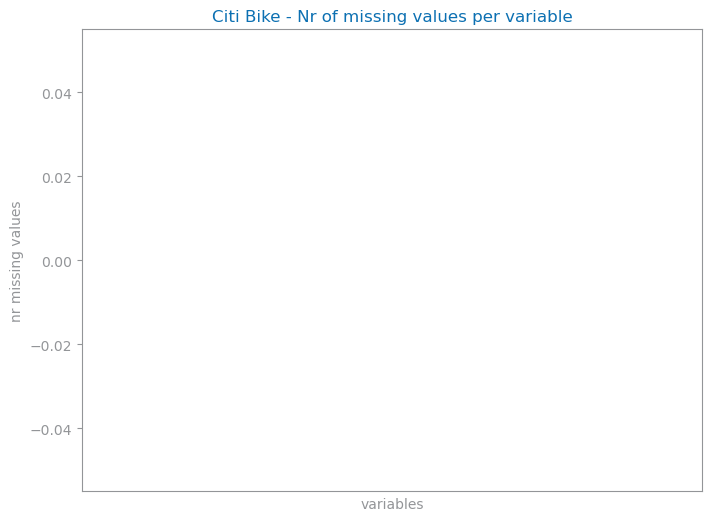

In [9]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure(figsize=(8, 6)) #(largura,altura) 

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title= f"{file_tag} - Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/{file_tag}_profiling_mv.png")
show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193597 entries, 0 to 3193596
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   bike_type            object 
 1   start_station        object 
 2   end_station          object 
 3   user_type            object 
 4   start_borough        object 
 5   end_borough          object 
 6   day_of_month         int64  
 7   hour                 int64  
 8   day_of_week          object 
 9   is_weekend           int64  
 10  time_of_day          object 
 11  ride_duration_min    float64
 12  temperature_2m       float64
 13  rain_mm              float64
 14  snowfall_cm          float64
 15  wmo_weather_code     int64  
 16  cloud_cover_low_pct  int64  
 17  wind_speed_10m       float64
 18  wmo_weather_desc     object 
 19  ride_distance_km     float64
 20  ride_avg_speed       float64
dtypes: float64(7), int64(5), object(9)
memory usage: 511.7+ MB


#### Analysis for the report

Our initial dataset, doesn't contain any missing value for the existing variables. 

### Variables Type

In [11]:
df.dtypes

bike_type               object
start_station           object
end_station             object
user_type               object
start_borough           object
end_borough             object
day_of_month             int64
hour                     int64
day_of_week             object
is_weekend               int64
time_of_day             object
ride_duration_min      float64
temperature_2m         float64
rain_mm                float64
snowfall_cm            float64
wmo_weather_code         int64
cloud_cover_low_pct      int64
wind_speed_10m         float64
wmo_weather_desc        object
ride_distance_km       float64
ride_avg_speed         float64
dtype: object

In [27]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": [], "id": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        elif c in id_cols:
            variable_types["id"].append(c)
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['day_of_month', 'hour', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm', 'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_station', 'end_station', 'start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc'], 'id': []}


#### Change symbolic columns type, to category (instead of object)

In [28]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

bike_type                object
start_station          category
end_station            category
user_type                object
start_borough          category
end_borough            category
day_of_month              int64
hour                      int64
day_of_week            category
is_weekend                int64
time_of_day            category
ride_duration_min       float64
temperature_2m          float64
rain_mm                 float64
snowfall_cm             float64
wmo_weather_code          int64
cloud_cover_low_pct       int64
wind_speed_10m          float64
wmo_weather_desc       category
ride_distance_km        float64
ride_avg_speed          float64
dtype: object

### variables per type plot

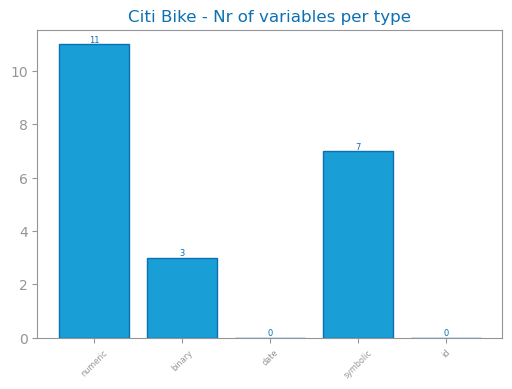

In [29]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(6, 4))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} - Nr of variables per type"
)
savefig(f"images/{file_tag}_profiling_variable_types.png")
show()

## Data Distribuition

In [12]:
summary5: df = df.describe(include="all")
summary5

,bike_type,start_station,end_station,user_type,start_borough,end_borough,day_of_month,hour,day_of_week,is_weekend,...,ride_duration_min,temperature_2m,rain_mm,snowfall_cm,wmo_weather_code,cloud_cover_low_pct,wind_speed_10m,wmo_weather_desc,ride_distance_km,ride_avg_speed
count,3193597,3193597,3193597,3193597,3193597,3193597,3.193597e+06,3.193597e+06,3193597,3.193597e+06,...,3.193597e+06,3.193597e+06,3.193597e+06,3193597.0,3.193597e+06,3.193597e+06,3.193597e+06,3193597,3.193597e+06,3.193597e+06
unique,2,2123,2174,2,6,7,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,electric_bike,W 21 St & 6 Ave,W 21 St & 6 Ave,member,Manhattan,Manhattan,NaN,NaN,Monday,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overcast,NaN,NaN
freq,2090566,13894,13821,2602598,2021324,2019845,NaN,NaN,572059,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1366921,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.666269e+01,1.410235e+01,NaN,2.703607e-01,...,1.301825e+01,1.308878e+01,7.936017e-02,0.0,8.430651e+00,1.996614e+01,1.541539e+01,NaN,2.006798e+00,1.098788e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,8.266573e+00,4.897273e+00,NaN,4.441462e-01,...,2.072067e+01,5.268971e+00,3.641502e-01,0.0,1.734894e+01,3.483365e+01,7.214514e+00,NaN,1.751503e+00,5.618649e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,0.000000e+00,...,1.001633e+00,6.000000e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,8.000000e-01,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,1.000000e+01,NaN,0.000000e+00,...,5.165117e+00,9.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+01,NaN,8.398004e-01,8.271336e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01,1.500000e+01,NaN,0.000000e+00,...,8.971517e+00,1.250000e+01,0.000000e+00,0.0,3.000000e+00,0.000000e+00,1.490000e+01,NaN,1.487608e+00,1.098033e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+01,1.800000e+01,NaN,1.000000e+00,...,1.572447e+01,1.710000e+01,0.000000e+00,0.0,3.000000e+00,2.000000e+01,2.020000e+01,NaN,2.611806e+00,1.382270e+01


In [13]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['day_of_month', 'hour', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm', 'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_station', 'end_station', 'start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc'], 'id': []}


### Numeric Values

#### Boxplot for All Numeric variables

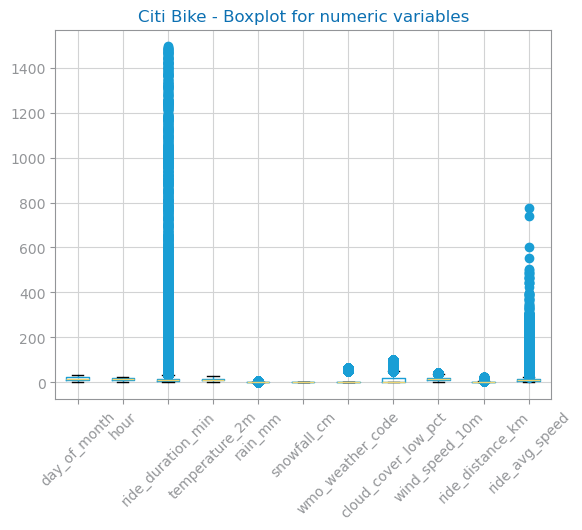

In [14]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    df[numeric].boxplot(rot=45)
    title(f'{file_tag} - Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_profiling_global_boxplot_numeric_vars.png")
    show()
else:
    print("There are no numeric variables.")

#### Boxplot for Single Variable Values

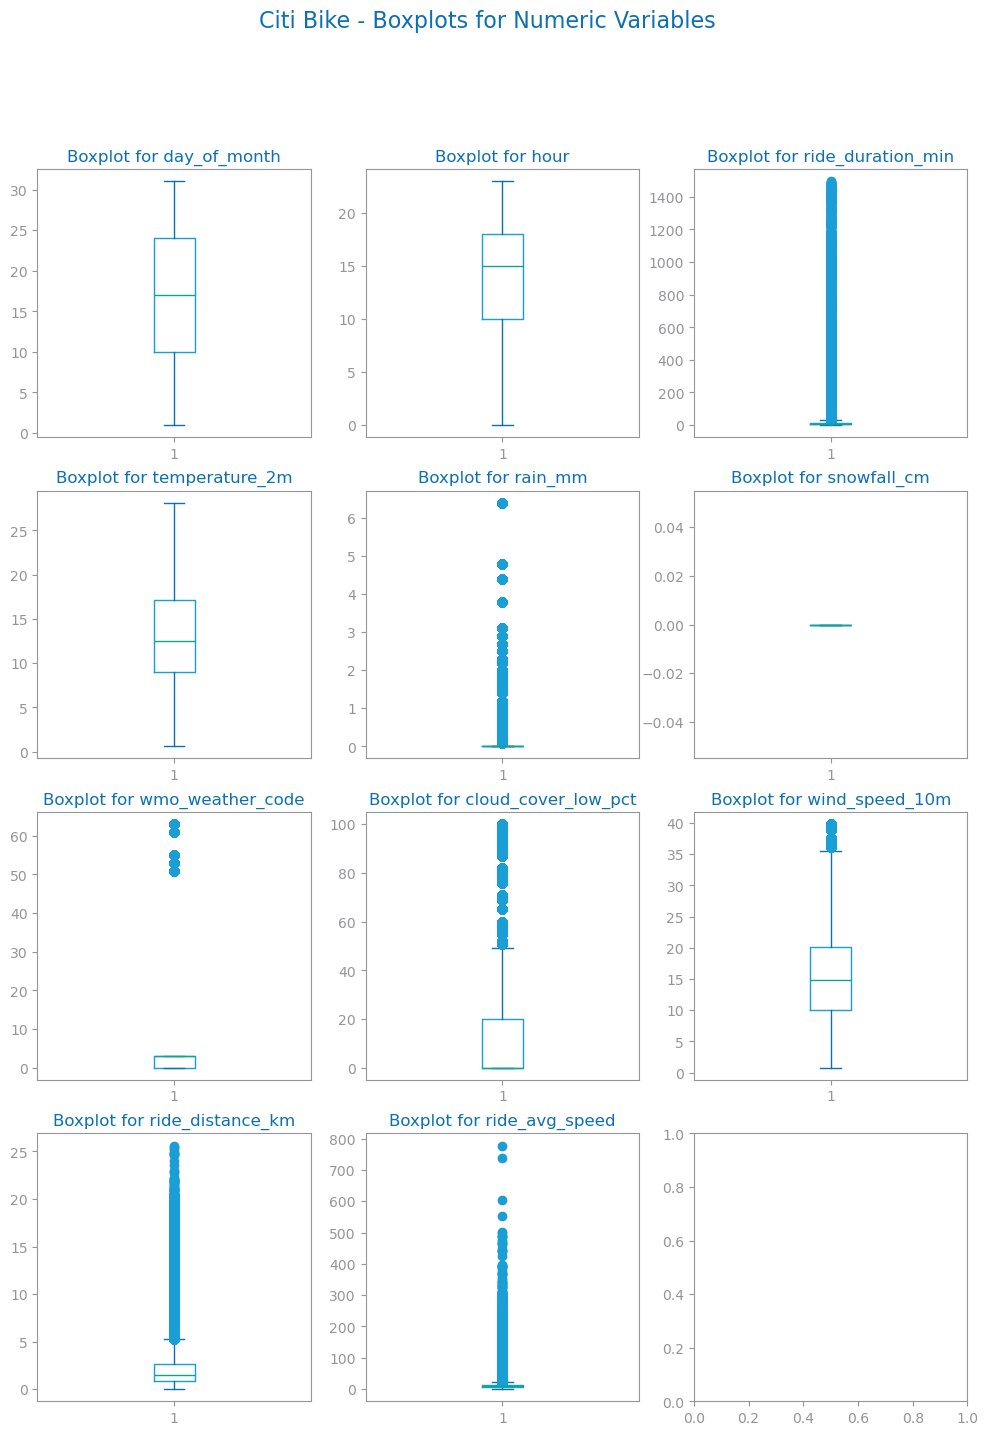

In [15]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} - Boxplots for Numeric Variables", fontsize=16)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_profiling_boxplot_single_num_vars.png")
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")

#### Identify the distribuiton of each numeric variable

In [16]:
df_sample = df.sample(n=100000, random_state=42)  # random_state garante reprodutibilidade


In [18]:
df_sample.head()

,bike_type,start_station,end_station,user_type,start_borough,end_borough,day_of_month,hour,day_of_week,is_weekend,...,ride_duration_min,temperature_2m,rain_mm,snowfall_cm,wmo_weather_code,cloud_cover_low_pct,wind_speed_10m,wmo_weather_desc,ride_distance_km,ride_avg_speed
1009713,electric_bike,34 St & 38 Ave,Newtown Ave & 23 St,member,Queens,Queens,8,19,Monday,0,...,9.287733,10.0,0.1,0.0,51,0,9.0,Drizzle: Light,2.155554,13.925165
1128609,electric_bike,10 Ave & W 28 St,8 Ave & W 31 St,member,Manhattan,Manhattan,25,15,Thursday,0,...,2.635267,11.2,0.0,0.0,0,0,13.7,Clear sky,0.619518,14.105249
2914392,classic_bike,W 20 St & 7 Ave,8 Ave & W 24 St,member,Manhattan,Manhattan,9,10,Tuesday,0,...,3.999483,19.1,0.0,0.0,3,0,6.8,Overcast,0.397128,5.957695
1167451,electric_bike,E 20 St & Park Ave,E 7 St & Ave A,member,Manhattan,Manhattan,13,13,Saturday,1,...,6.687183,8.6,0.3,0.0,51,17,31.6,Drizzle: Light,1.371416,12.304875
2905812,electric_bike,Ave D & E 8 St,Cleveland Pl & Spring St,member,Manhattan,Manhattan,15,6,Monday,0,...,7.118917,11.6,0.0,0.0,0,0,8.7,Clear sky,1.818732,15.328722


ZeroDivisionError: float division by zero

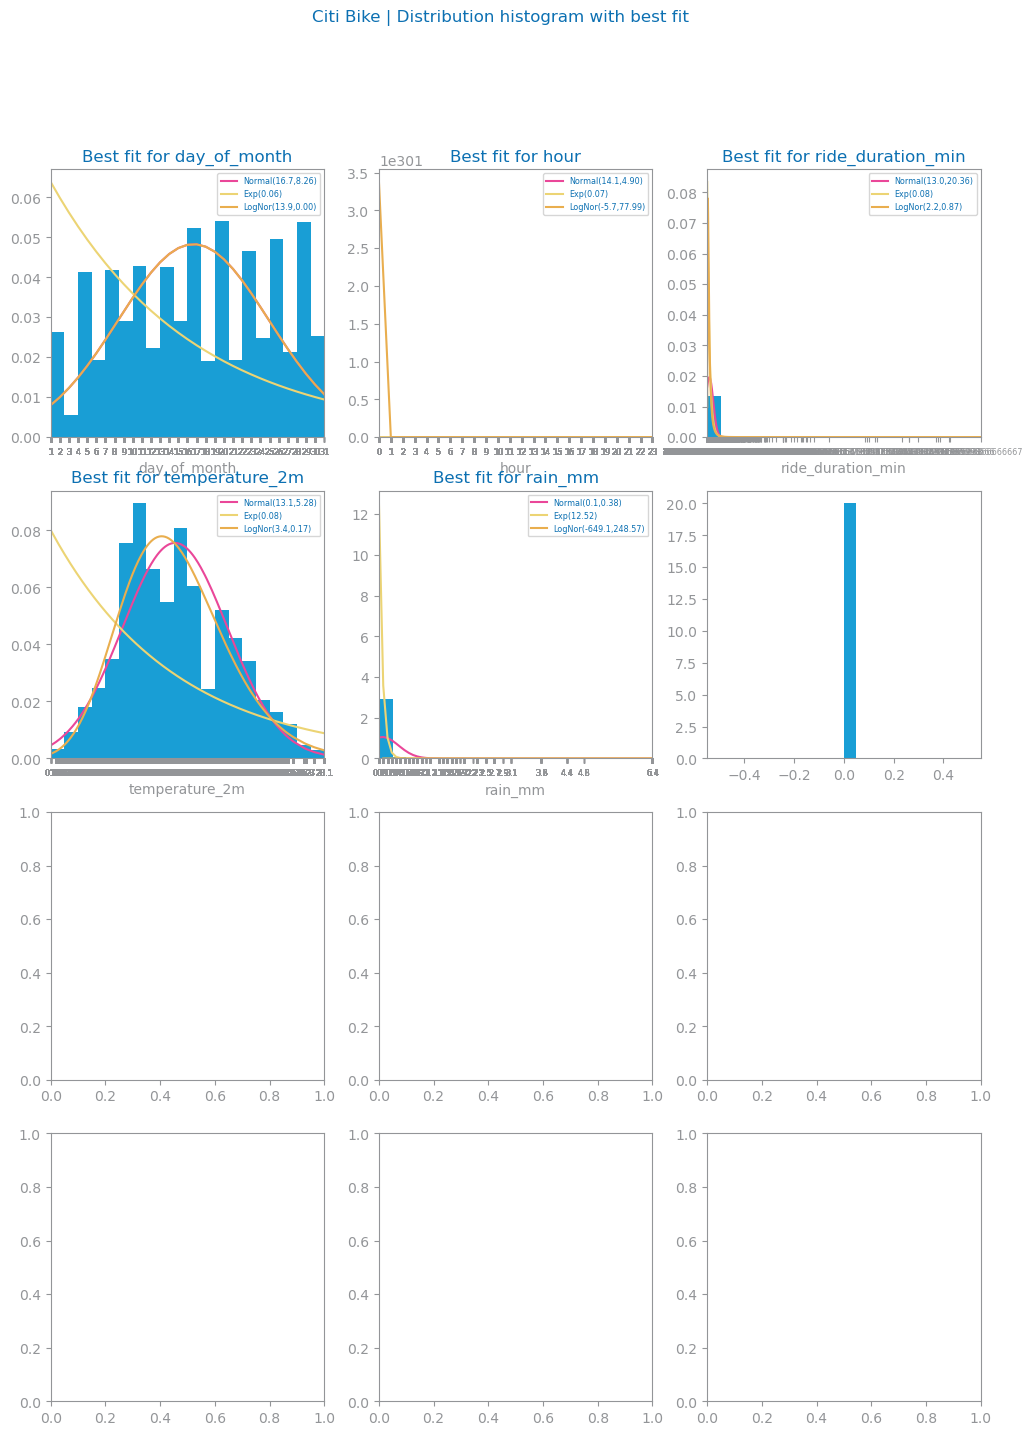

In [19]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
#from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    if len(x_values) > 0:  # Check for empty list
        # Gaussian
        mean, sigma = norm.fit(x_values)
        distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
        # Exponential
        loc, scale = expon.fit(x_values)
        distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
        # LogNorm
        sigma, loc, scale = lognorm.fit(x_values)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    if len(values) > 0:  # Check for empty values list
        ax.hist(values, 20, density=True)
        distributions: dict = compute_known_distributions(values)
        plot_multiline_chart(
            values,
            distributions,
            ax=ax,
            title="Best fit for %s" % var,
            xlabel=var,
            ylabel="",
        )
    else:
        print(f"No data available for {var}")


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Distribution histogram with best fit')
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df_sample[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")


##Get insights

#### Outliers - For each numeric variables ( Univariate outliers)

***There's two methods to identifying outliers (univariate):***

1. **Standard Deviation-Based Outliers**
   - **Theory**: The standard deviation quantifies the dispersion of data around the mean. For normally distributed data, about 68% of values are within 1 standard deviation, 95% within 2, and 99.7% within 3 (68-95-99.7 rule). 
   - **How it Works**: If `std_based=True`, the code calculates upper (`top`) and lower (`bottom`) outlier thresholds based on a multiple of the standard deviation.    Values more than `n` standard deviations above or below the mean are considered outliers. 
   - **How to chose n**: The value of n represents the number of standard deviations away from the mean. In general, the choice of n depends on your objective, but the most commonly used values are:
      - n = 2: Values that are more than 2 standard deviations from the mean are considered outliers.
      - n = 3: For a more stringent criterion, values more than 3 standard deviations from the mean can be considered outliers.
  The choice between 2 or 3 depends on your tolerance for identifying outliers. Using 2 is more sensitive, while 3 is more conservative, identifying only the extreme values.

   - **Formula**:
     - Upper Threshold: `top = mean + (n * std)`
     - Lower Threshold: `bottom = mean - (n * std)`
   - **Pros**: Effective for normally distributed data.
   - **Cons**: Less effective for skewed distributions or datasets with many extreme values.
    

2. **Interquartile Range (IQR)-Based Outliers**
   - **Theory**: The IQR measures the middle 50% of the data, calculated as `Q3 - Q1`. Outliers are defined as values outside `Q1 - 1.5 * IQR` or `Q3 + 1.5 * IQR`.
   - **How it Works**: If `std_based=False`, the code calculates outlier thresholds based on the IQR and `iqrfactor`.
   - **Formula**:
     - Upper Threshold: `top = Q3 + (iqrfactor * IQR)`
     - Lower Threshold: `bottom = Q1 - (iqrfactor * IQR)`
   - **Definitions**:
      - Q1 (First Quartile): The value below which 25% of the data points are located.
      - Q2 (Median or Second Quartile): The value that divides the data in half, meaning 50% of the data points are below the median and 50% are above.
      - Q3 (Third Quartile): The value below which 75% of the data points are located, or above which are the top 25% of the data points.
   - **Pros**: Robust to extreme values and more effective for skewed or non-normal data.
   - **Cons**: Less sensitive when the distribution does not have many outliers.

***Outlier Detection Summary***
For each numeric variable (e.g., `ride_distance_km`, `ride_avg_speed`), summary statistics (mean, quartiles, standard deviation, etc.) are calculated. Outliers are identified and counted based on the thresholds calculated using either the standard deviation or IQR method.

- **Standard Deviation Approach**: Identifies data points too far from the mean (more than `n` standard deviations).
- **IQR Approach**: Identifies data points too far from the interquartile range (more than 1.5 * IQR).
- **Outlier Counting**: Outliers are counted for each variable based on the thresholds.
- **Visualization**: Outlier counts are visualized with bar charts or other visuals to aid analysis.

Both methods are useful depending on the nature of the data and variable distribution.


In [17]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['day_of_month', 'hour', 'ride_duration_min', 'temperature_2m', 'rain_mm', 'snowfall_cm', 'wmo_weather_code', 'cloud_cover_low_pct', 'wind_speed_10m', 'ride_distance_km', 'ride_avg_speed'], 'binary': ['bike_type', 'user_type', 'is_weekend'], 'date': [], 'symbolic': ['start_station', 'end_station', 'start_borough', 'end_borough', 'day_of_week', 'time_of_day', 'wmo_weather_desc'], 'id': []}


- NR_STDEV = 2
- IQR_FACTOR=1.5

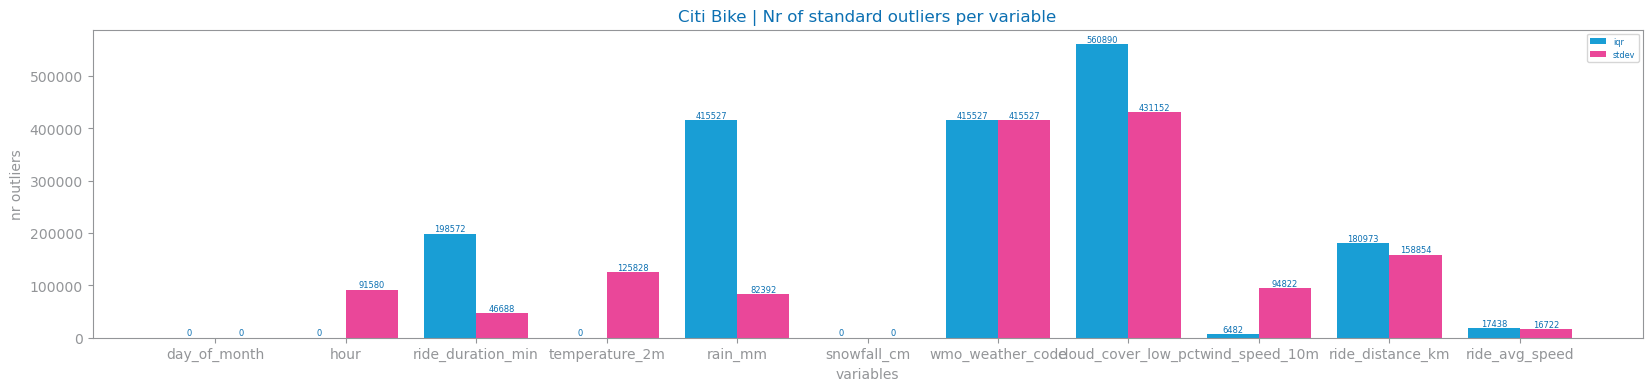

In [18]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 2 #choose between 2 and 3
IQR_FACTOR: float = 1.5 #normaly it's always 1,5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(20, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title=f"{file_tag} | Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

- NR_STDEV = 3
- IQR_FACTOR=1.5

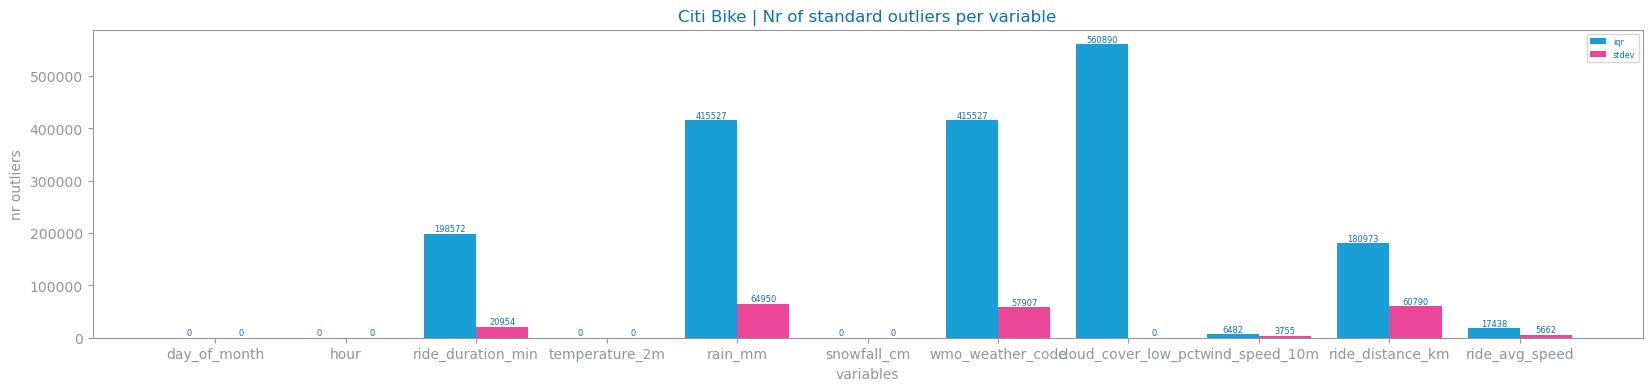

In [19]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 3 #choose between 2 and 3
IQR_FACTOR: float = 1.5 #normaly it's always 1,5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(20, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title=f"{file_tag} | Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

#### Numeric Values - Distribuiton Histogram

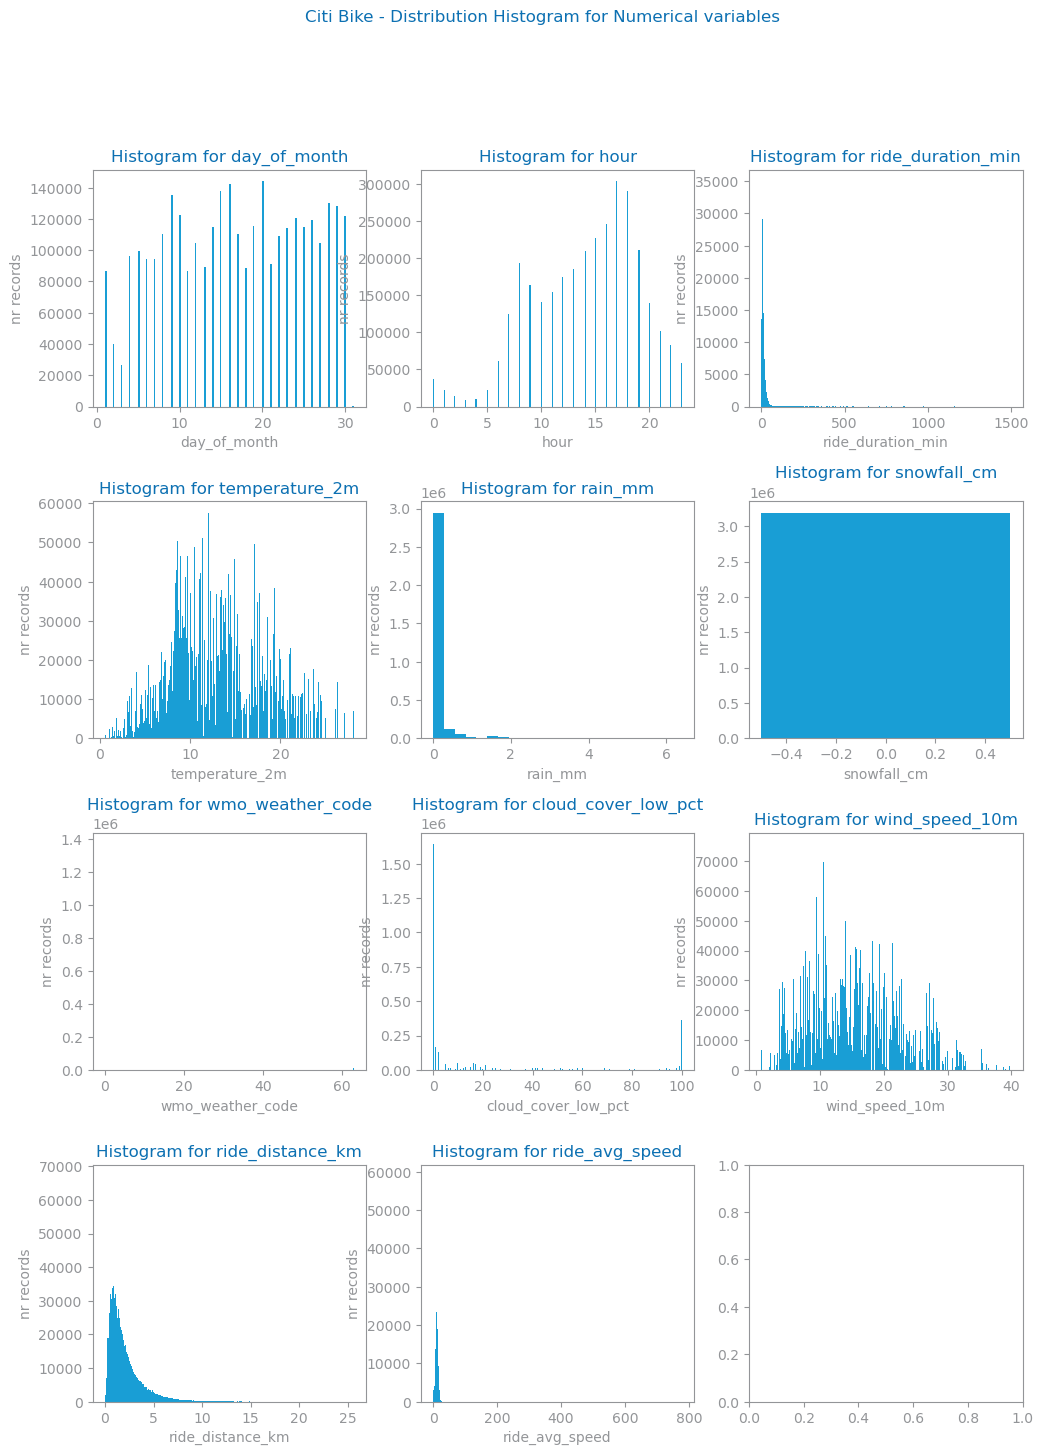

In [20]:
from dslabs_functions import set_chart_labels
from matplotlib.pyplot import subplots, show  # Ensure you have these imports

# Assuming numeric is a list of numeric variable names
# Exclude 'product_id' and 'category_id' from the numeric list
filtered_numeric = [var for var in numeric if var not in ['product_id', 'category_id']]

if filtered_numeric:
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    i, j = 0, 0
    fig.suptitle(f'{file_tag} - Distribution Histogram for Numerical variables')

    for n in range(len(filtered_numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {filtered_numeric[n]}",
            xlabel=filtered_numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[filtered_numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    fig.subplots_adjust(hspace=0.4)  # Aumenta o espaço vertical entre os subplots

    # savefig(f"images/{file_tag}_single_histograms_numeric.png")
    savefig(f"images/{file_tag}_profiling_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")


#### Analysis for the report

Some insights that we can take from the histogram for each numeric variable:
- We can remove col snowfall_cm, as this column is always 0. The dataset has data from April/2024, which makes sense, because in new york only snows in dec/jan.
- Hours: The period with the most rides during the day is after work hours, between 5 PM and 7 PM.
- day_of_the_month: The rides are well distributed throughout the month, meaning there isn’t a specific period—beginning, middle, or end—where users take significantly more rides.
- ride_distance_km: We can see that more than 80% of the rides during this period were likely short trips between 0 and 5 km. Most frquent, is theu sers riding for 2km

### Symbolic variables

#### Histogram for distribuition of variables

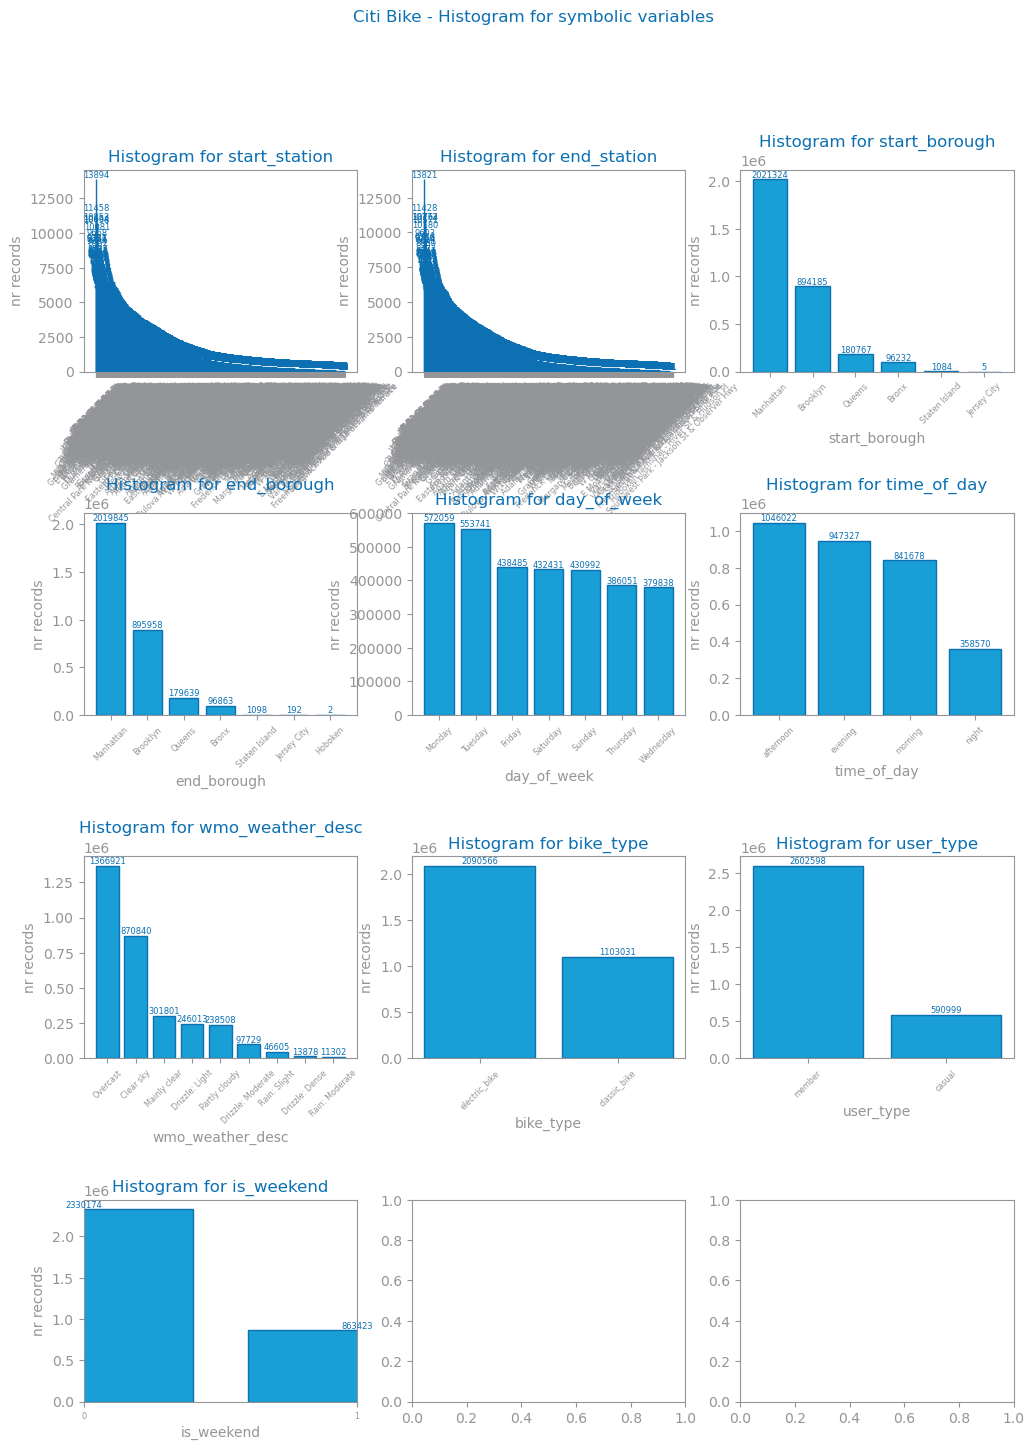

In [21]:
from dslabs_functions import plot_bar_chart
from pandas import Series

# Supondo que você tenha criado a coluna 'category_product' anteriormente

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Criar a lista de variáveis simbólicas, excluindo 'category_product'
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]

if symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0

    fig.suptitle(f'{file_tag} - Histogram for symbolic variables')

    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    
    fig.subplots_adjust(hspace=0.7)  # Aumenta o espaço vertical entre os subplots

    savefig(f"images/{file_tag}_profiling_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")


In [20]:
# Verifica se a coluna 'day' existe no DataFrame
if 'day_of_month' in df.columns:
    # Conta o número de dias únicos na coluna 'day'
    unique_days = df['day_of_month'].nunique()
    print(f"Número de dias únicos no dataset: {unique_days}")
else:
    print("A coluna 'day' não existe no DataFrame.")


Número de dias únicos no dataset: 31


#### Analysis for the report

Some insights that we can take from the histogram for each symbolic and binary variable:

**symbolic variables**:
- start_borough and end_borough: The Citi Bike system is primarily used in Manhattan and Brooklyn. In fact, most rides start and end in Manhattan
- day_of_week: There are more rides at the start of the week, on Monday and Tuesday. However, overall, the system seems to be used fairly evenly throughout the week, which could mean that most users are members who ride regularly every day.
- day_of_the_month: The rides are well distributed throughout the month, meaning there isn’t a specific period—beginning, middle, or end—where users take significantly more rides.
- time_of_day: The bikes are more used after 12pm, in the afternoon. and espeacilly at evening_rush (5pm to 8pm)
- wmo_weather_desc: Almost 50% of the rides were done under overcast days. And 30% of the rides with clear sky. As predicted, the citi bike are not being used much in rainy days.

**binary variables**:
- bike_type: Clearly, and as expected the users use more the electric bycicle (70%) than the classical one (30%), becasue it's more easy to drive.
- user_type: Around 80% of the rides were done by members. Which means that the citi bike system is mostly used by local residents in new yor, that probably use the bike for commute, and probably use the bycicle on a daily basis
- is_weekend: around 75% of the rides were done during the week.

# Sparsity

In [141]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart


df = df.dropna()

vars: list = df.columns.to_list()
if [] != vars:
    target = "is_purchase"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    savefig(f"images/{file_tag}_profiling_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")

KeyboardInterrupt: 

In [82]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

# Remover valores ausentes
df = df.dropna()

# Excluir 'product_category' da lista de variáveis
vars: list = [var for var in df.columns if var != 'product_category']

if [] != vars:
    target = "is_purchase"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    
    # Plotar gráficos de dispersão múltiplos excluindo 'product_category'
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    
    # Salvar e mostrar a figura
    savefig(f"images/{file_tag}_profiling_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")


KeyboardInterrupt: 

: 

: 

# Correlation Analysis

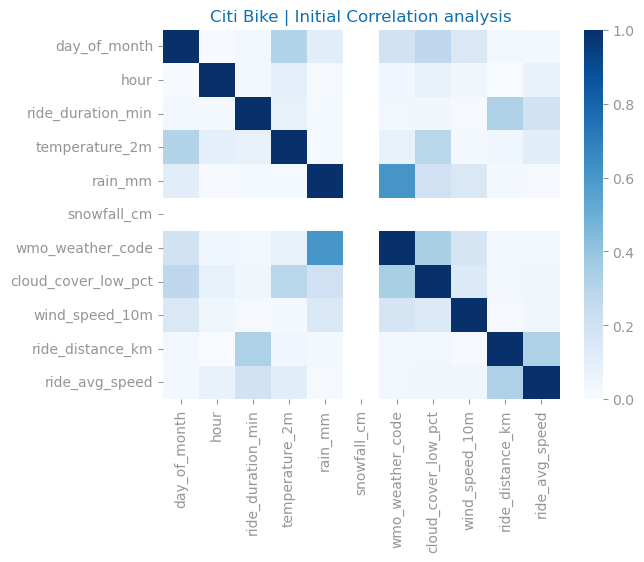

In [21]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
from matplotlib.pyplot import figure, title, savefig, show

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

title(f'{file_tag} | Initial Correlation analysis')

savefig(f"images/{file_tag}_correlation_analysis.png")
show()

#### Analysis for the report

- Do again the correlation Analysis after econding in next phase - Data Preparation/Encoding
    - After encoding, with the correlation analysis we will consider all the variables in the dataset

# Excel File for encoding mapping

In [24]:
import os
from openpyxl import load_workbook


# Function to append distinct combinations of selected columns into sheets in an Excel file
def append_columns_to_excel(df, columns_dict, output_file):
    """
    Append distinct combinations of selected columns into separate sheets in an existing Excel file,
    with the columns ordered by their names for easier hierarchical encoding and add an empty encoding column.

    Args:
    df (pd.DataFrame): The DataFrame containing the columns to save.
    columns_dict (dict): Dictionary where keys are sheet names, and values are lists of column names to include.
    output_file (str): The path of the Excel file to save the sheets.

    Returns:
    None
    """
    # Check if the file exists and is a valid Excel file
    if os.path.exists(output_file):
        try:
            # Try to load the existing workbook
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                writer.book = load_workbook(output_file)
                
                # Loop over each sheet name and corresponding list of columns
                for sheet_name, columns in columns_dict.items():
                    # Check if all the specified columns exist in the DataFrame
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                        continue

                    # Get distinct combinations of the selected columns
                    distinct_values = df[columns].drop_duplicates().dropna(how='all')

                    # Convert columns to strings temporarily for sorting to avoid float-string comparison errors
                    distinct_values = distinct_values.astype(str)

                    # Sort distinct values by the specified columns for hierarchical grouping
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add an empty encoding column for each column in the DataFrame
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    # Write distinct values to a new sheet named after the sheet_name
                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)
                    
        except Exception as e:
            print(f"Error: {e}")
            print("The file might be corrupt or invalid. Creating a new file.")
            # Create a new file if loading fails
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
                for sheet_name, columns in columns_dict.items():
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                        continue

                    # Get distinct combinations of the selected columns
                    distinct_values = df[columns].drop_duplicates().dropna(how='all')

                    # Convert columns to strings temporarily for sorting
                    distinct_values = distinct_values.astype(str)

                    # Sort distinct values by the specified columns for hierarchical grouping
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add an empty encoding column for each column in the DataFrame
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

    else:
        # If the file does not exist, create a new one
        with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
            for sheet_name, columns in columns_dict.items():
                missing_columns = [col for col in columns if col not in df.columns]
                if missing_columns:
                    print(f"Warning: The following columns are not found in the DataFrame for sheet '{sheet_name}': {missing_columns}")
                    continue

                # Get distinct combinations of the selected columns
                distinct_values = df[columns].drop_duplicates().dropna(how='all')

                # Convert columns to strings temporarily for sorting
                distinct_values = distinct_values.astype(str)

                # Sort distinct values by the specified columns for hierarchical grouping
                distinct_values.sort_values(by=columns, inplace=True)

                # Add an empty encoding column for each column in the DataFrame
                for col in columns:
                    distinct_values[f'{col}_enc'] = pd.NA

                distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)
                

# Define the groups of columns for hierarchical encoding, grouped by sheet name
columns_to_save = {
    
    'bike_type' : ['bike_type'],  
    'user_type': ['user_type'],
    'wmo_weather_desc': ['wmo_weather_desc']}

# Save the distinct values combinations of each column group into corresponding sheets
append_columns_to_excel(df, columns_to_save, f'data/citi_bike_values_pre_encoding.xlsx')

print("Excel file has been updated successfully.")

Error: property 'book' of 'OpenpyxlWriter' object has no setter
The file might be corrupt or invalid. Creating a new file.
Excel file has been updated successfully.


In [25]:
import os
from openpyxl import load_workbook
import pandas as pd

def append_columns_to_excel(df, columns_dict, output_file):
    """
    Append distinct combinations of selected columns into separate sheets in an existing Excel file,
    with the columns ordered by their names for easier hierarchical encoding and add an empty encoding column.
    """
    # Check if the file exists and is a valid Excel file
    if os.path.exists(output_file):
        try:
            # Load the existing workbook
            workbook = load_workbook(output_file)

            # Open ExcelWriter with the loaded workbook
            with pd.ExcelWriter(output_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                writer.book = workbook  # Correct way to set the workbook
                for sheet_name, columns in columns_dict.items():
                    missing_columns = [col for col in columns if col not in df.columns]
                    if missing_columns:
                        print(f"Warning: Missing columns for '{sheet_name}': {missing_columns}")
                        continue

                    distinct_values = df[columns].drop_duplicates().dropna(how='all').astype(str)
                    distinct_values.sort_values(by=columns, inplace=True)

                    # Add empty encoding columns
                    for col in columns:
                        distinct_values[f'{col}_enc'] = pd.NA

                    distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

        except Exception as e:
            print(f"Error: {e}")
            print("Creating a new file.")
    else:
        # Create a new file if it doesn't exist
        with pd.ExcelWriter(output_file, engine='openpyxl', mode='w') as writer:
            for sheet_name, columns in columns_dict.items():
                missing_columns = [col for col in columns if col not in df.columns]
                if missing_columns:
                    print(f"Warning: Missing columns for '{sheet_name}': {missing_columns}")
                    continue

                distinct_values = df[columns].drop_duplicates().dropna(how='all').astype(str)
                distinct_values.sort_values(by=columns, inplace=True)

                for col in columns:
                    distinct_values[f'{col}_enc'] = pd.NA

                distinct_values.to_excel(writer, sheet_name=sheet_name, index=False)

print("Excel file has been updated successfully.")


Excel file has been updated successfully.


# Analysis

## Short analysis for the report:


# NOTES / TO DOS

- Ver quais as variaveis que quero fazer enconding - **(TO DO)**
- Correr o codigo do encoding file e exportar o csv - **(TO DO)**
- fazer encoding manual nas variaveis simolicas nesse ficheiro - **(TO DO)**
- Importar o ficheiro para o step/file _2_citibike_data_prp_encoding - **(TO DO)**